# 3강 데이터 탐색하기

## 정규분포 데이터 예시

In [1]:
import pandas as pd

rt = pd.read_csv('../data/rt-gaussian.csv')
print(rt)

     reaction_time
0       524.835708
1       493.086785
2       532.384427
3       576.151493
4       488.292331
..             ...
195     519.265869
196     455.807128
197     507.686255
198     502.910436
199     442.851485

[200 rows x 1 columns]


### 평균과 표준편차

In [2]:
from scipy import stats

print(stats.norm.fit(rt)) # 평균, 표준편차

(497.9614517413958, 46.43367443677357)


### 히스토그램과 이론적 곡선

<Axes: ylabel='Density'>

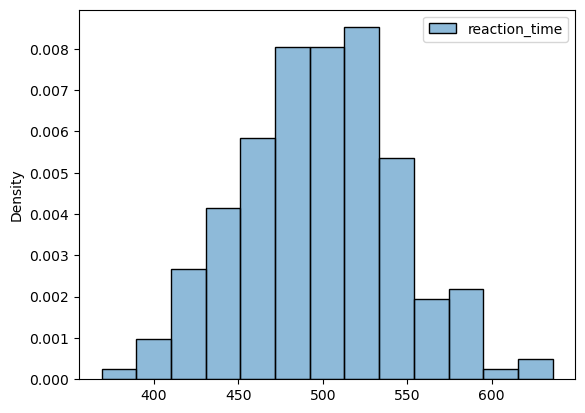

In [3]:
import seaborn as sns

sns.histplot(rt, stat='density')

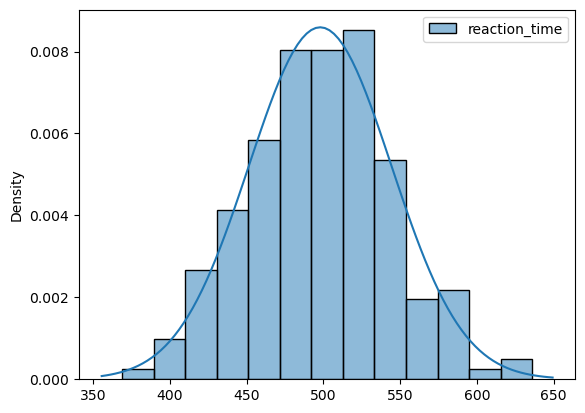

In [4]:
import numpy as np

ax = sns.histplot(rt, stat='density')
x = np.linspace(*ax.get_xlim(), 100)

mean, std = stats.norm.fit(rt)
ax.plot(x, stats.norm.pdf(x, mean, std))

### 68-95-99.7 규칙

[평균-1표준편차, 평균+1표준편차] 사이에 데이터의 68%가 들어있는지 확인해 보자.

In [5]:
print(((mean - std < rt) & (rt < mean + std)).mean())

reaction_time    0.69
dtype: float64


[평균-2표준편차, 평균+2표준편차] 사이에 데이터의 95%가 들어있는지 확인해 보자.

In [6]:
print(((mean - 2*std < rt) & (rt < mean + 2*std)).mean())

reaction_time    0.94
dtype: float64


[평균-3표준편차, 평균+3표준편차] 사이에 데이터의 97%가 들어있는지 확인해 보자.

In [7]:
print(((mean - 3*std < rt) & (rt < mean + 3*std)).mean())

reaction_time    1.0
dtype: float64


## 상자그림

<Axes: >

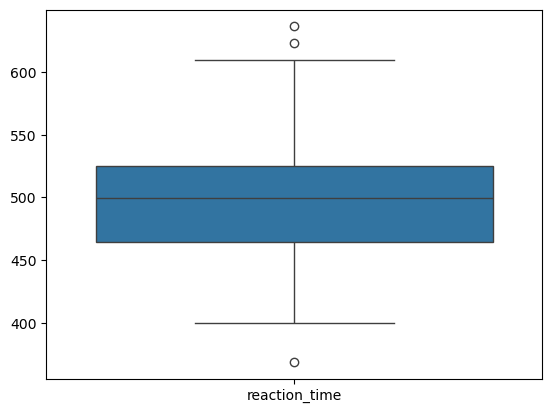

In [8]:
sns.boxplot(rt)

## 더 현실적인 데이터: 조건별 반응시간

### 데이터프레임

In [9]:
df = pd.read_csv('../data/rt-condition.csv')
print(df)

     condition  reaction_time
0    high_freq     464.901425
1    high_freq     445.852071
2    high_freq     469.430656
3    high_freq     495.690896
4    high_freq     442.975399
..         ...            ...
295   low_freq     545.354520
296   low_freq     624.979994
297   low_freq     595.364976
298   low_freq     620.643106
299   low_freq     611.481442

[300 rows x 2 columns]


### 요약 통계량

In [10]:
print(df.describe()) # 수치형 데이터 요약

       reaction_time
count     300.000000
mean      510.303359
std        68.867341
min       371.407647
25%       457.688461
50%       499.909636
75%       555.445421
max       772.636575


In [ ]:
from pandas.api.types import CategoricalDtype

# 순서형 자료형 만들기
cat_type = CategoricalDtype(
    categories=['low_freq', 'mid_freq', 'high_freq'],
    ordered=True
)

df['condition'] = df['condition'].astype(cat_type)

In [12]:
print(df.value_counts('condition')) # 범주형 데이터 요약

condition
low_freq     100
mid_freq     100
high_freq    100
Name: count, dtype: int64


<Axes: ylabel='reaction_time'>

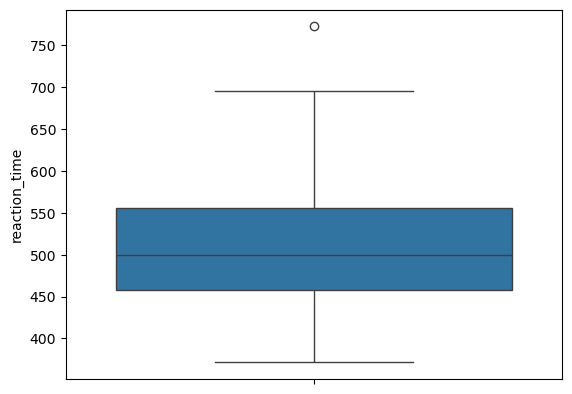

In [13]:
sns.boxplot(data=df, y='reaction_time')

### 조건별 분석

In [14]:
print(df.groupby('condition').describe())

          reaction_time                                                 \
                  count        mean        std         min         25%   
condition                                                                
low_freq          100.0  583.244813  54.214144  417.936633  547.227823   
mid_freq          100.0  500.780661  33.378414  432.843007  471.801882   
high_freq         100.0  446.884604  27.245053  371.407647  431.972830   

                                               
                  50%         75%         max  
condition                                      
low_freq   584.884787  615.221872  772.636575  
mid_freq   502.943751  518.835966  595.205921  
high_freq  446.191311  462.178562  505.568346  


/var/folders/kf/sgbqbm5n6ljdfl977d2c4jqc0000gp/T/ipykernel_10912/2415335209.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('condition').describe())


<Axes: ylabel='reaction_time'>

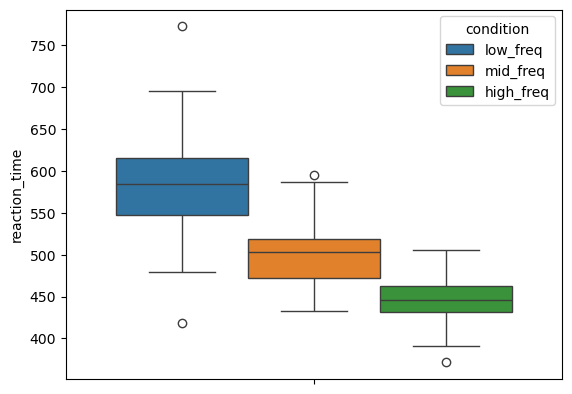

In [15]:
sns.boxplot(data=df, y='reaction_time', hue='condition')